# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "/Users/juliencounts/Desktop/Data_Analysis/Data_Viz/Module-5-Homework/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/juliencounts/Desktop/Data_Analysis/Data_Viz/Module-5-Homework/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_study= pd.merge(mouse_metadata, study_results)
# Display the data table for preview
complete_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [103]:
# Checking the number of mice.
mouse_count= complete_study['Mouse ID'].nunique()
print(f"Number of mice in study: {mouse_count}")

Number of mice in study: 249


In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= complete_study.loc[complete_study.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [105]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_rows= complete_study[complete_study.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [106]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= complete_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [107]:
# Checking the number of mice in the clean DataFrame.
mice_count= clean_data["Mouse ID"].nunique()
print(f"Number of mice in study: {mice_count}")

Number of mice in study: 249


## Summary Statistics

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean= clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median= clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance= clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_stdev= clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem= clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.

summary_stats1= pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                               "Standard Deviation": regimen_stdev, "SEM": regimen_sem})
summary_stats1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats2= clean_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats2 = summary_stats2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summary_stats2

/var/folders/xn/zxr8x63d7dl9t22nbdnj_b2c0000gn/T/ipykernel_33999/1349095594.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats2= clean_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

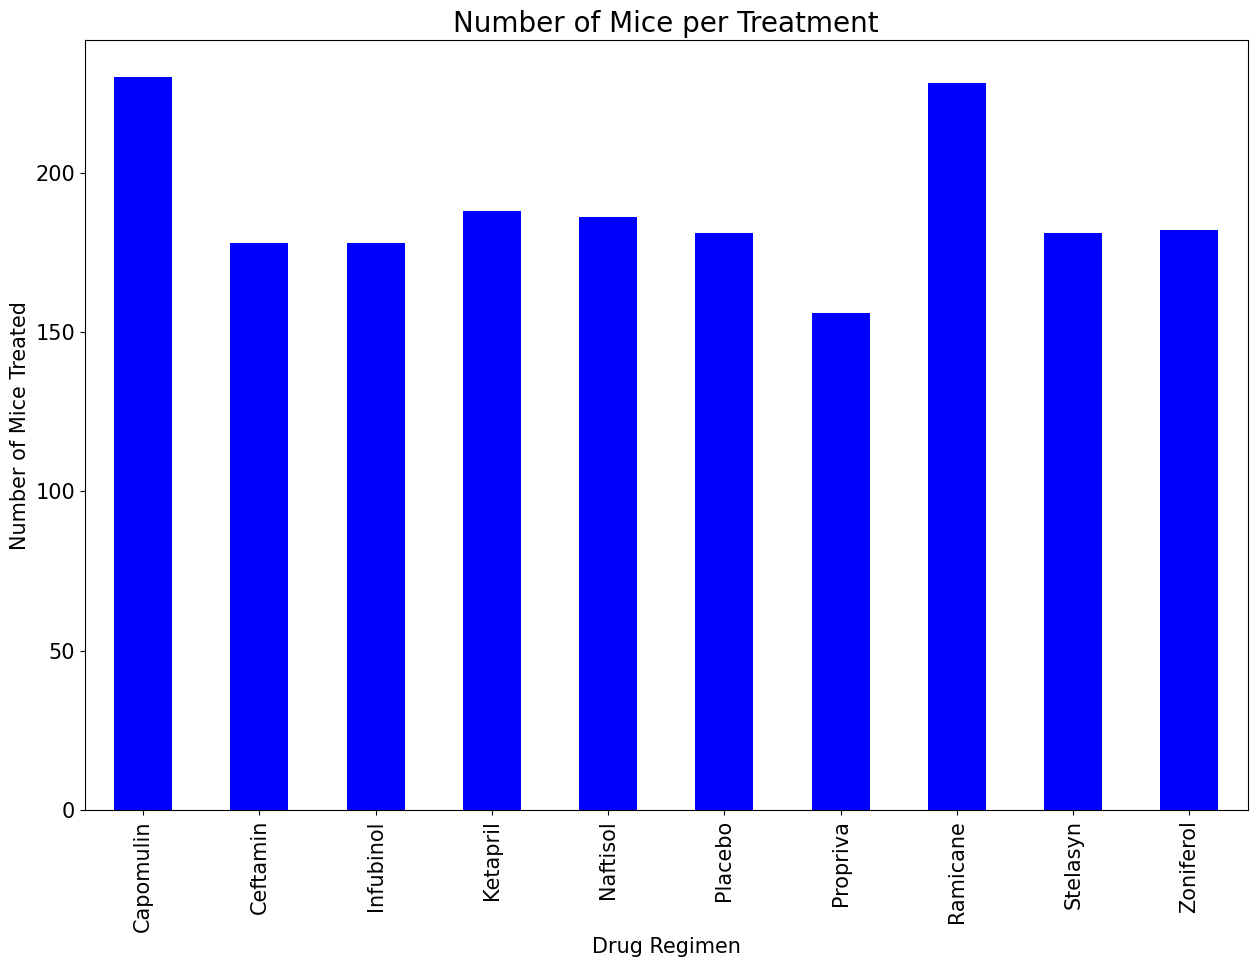

<Figure size 640x480 with 0 Axes>

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_on_drug= clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

mice_plot = mice_on_drug.plot(kind="bar", color='b', figsize=(15,10), fontsize = 15)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)
plt.show()
plt.tight_layout()

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

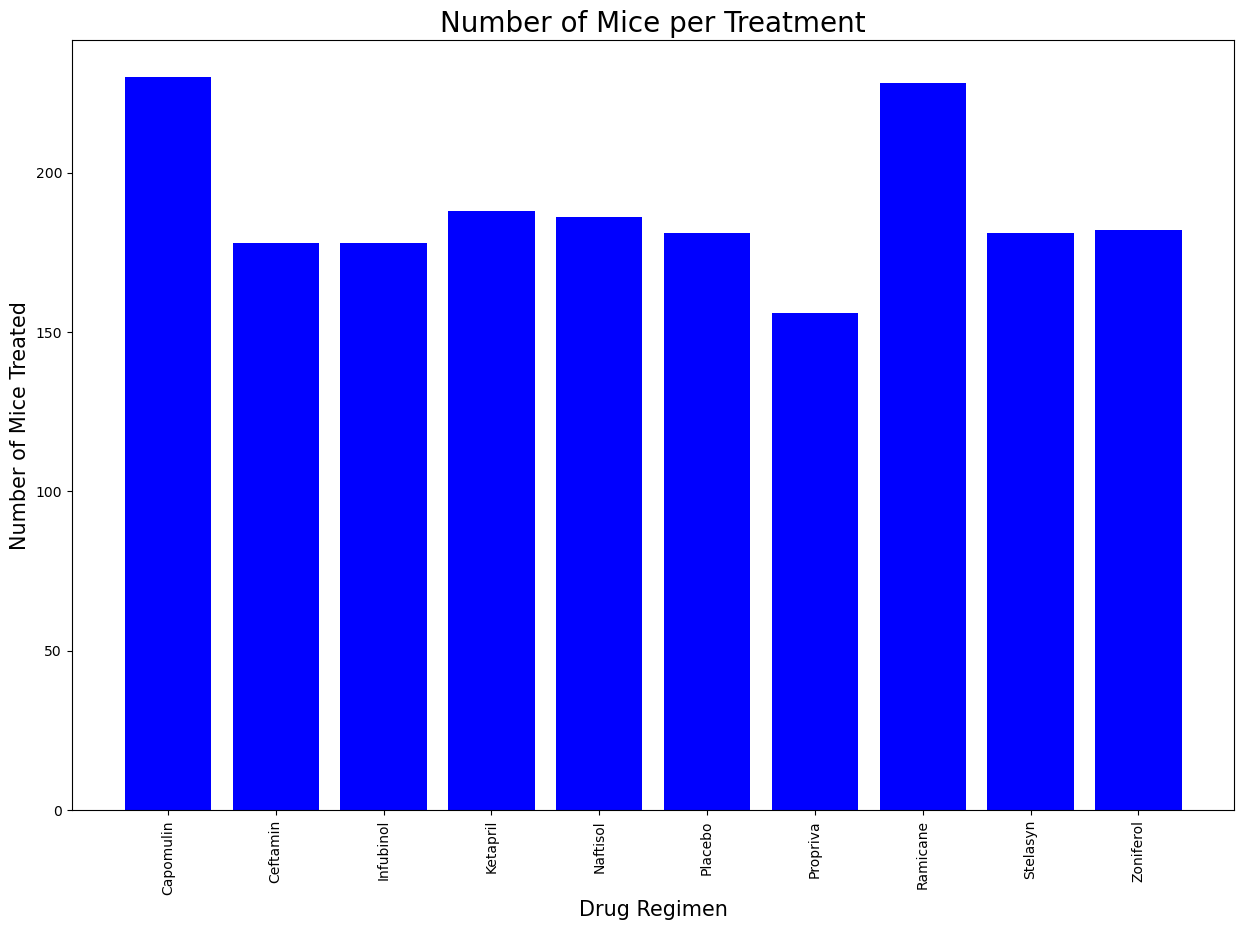

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_time = (clean_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis=np.arange(len(mice_on_drug))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(tick_locations, mice_on_drug.index.values, rotation="vertical")
plt.bar(x_axis, mice_time, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)

mice_time

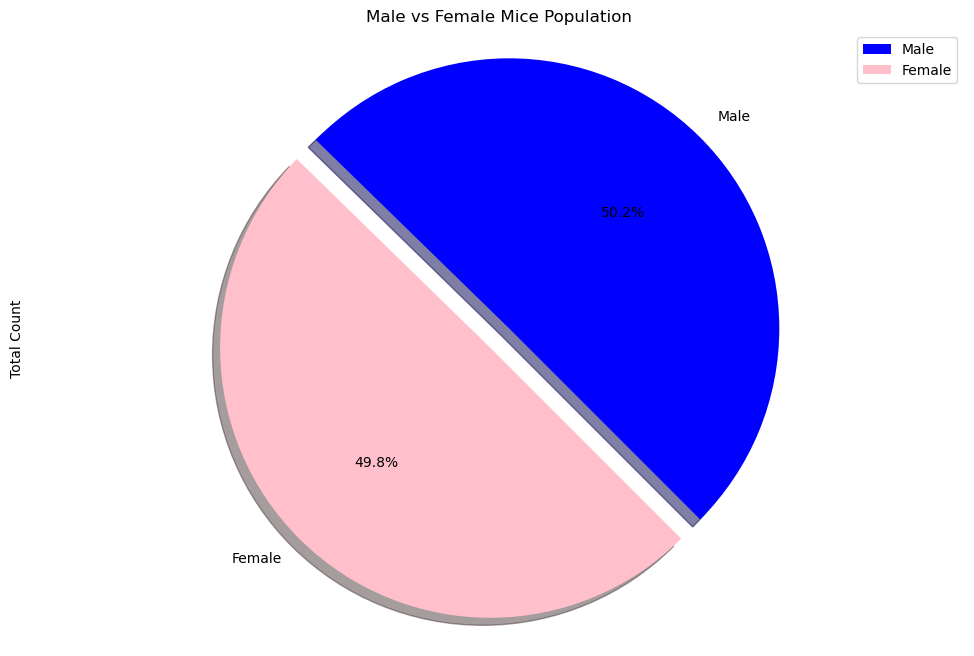

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_rows= clean_data.loc[:, ["Sex", "Mouse ID"]]
mice_sex_rows= mice_sex_rows.drop_duplicates()
mice_sex_count= mice_sex_rows["Sex"].value_counts()

mice_sex_data= pd.DataFrame({"Total Count": mice_sex_count})

colors = ["blue", "pink"]
explode = (0.1, 0)
pie_graph_pandas = mice_sex_data.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                              startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

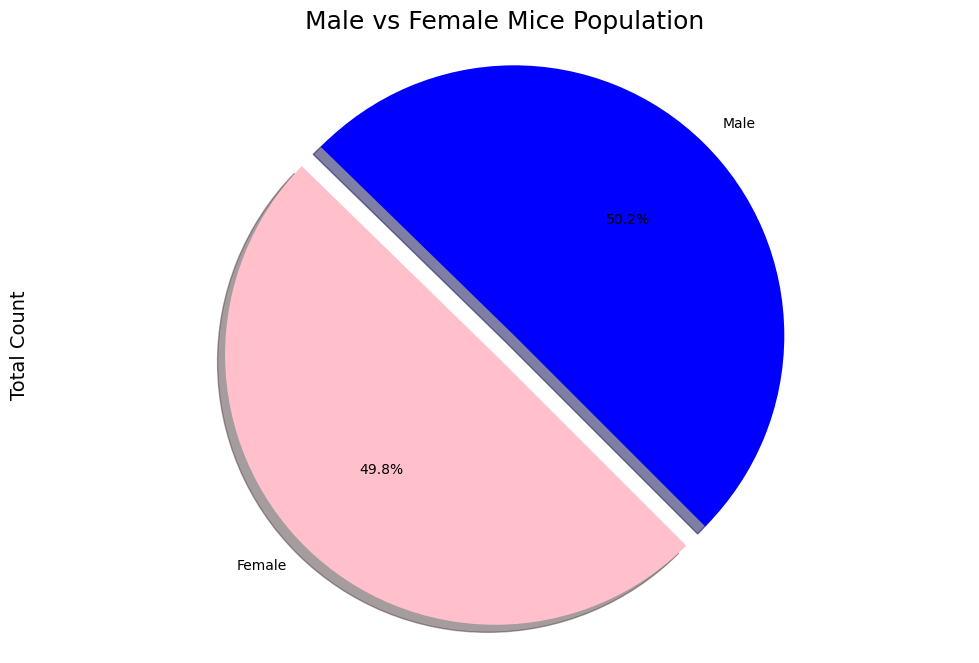

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_rows= clean_data.loc[:, ["Sex", "Mouse ID"]]
mice_sex_rows= mice_sex_rows.drop_duplicates()
mice_sex_count= mice_sex_rows["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "pink"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Male vs Female Mice Population",fontsize = 18)
plt.ylabel("Total Count",fontsize = 14)
plt.pie(mice_sex_count, labels=labels, colors=colors, startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= clean_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint= last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_timepoint = last_timepoint.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data_timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [156]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_empty= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol= merged_data_timepoint.loc[merged_data_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_empty.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


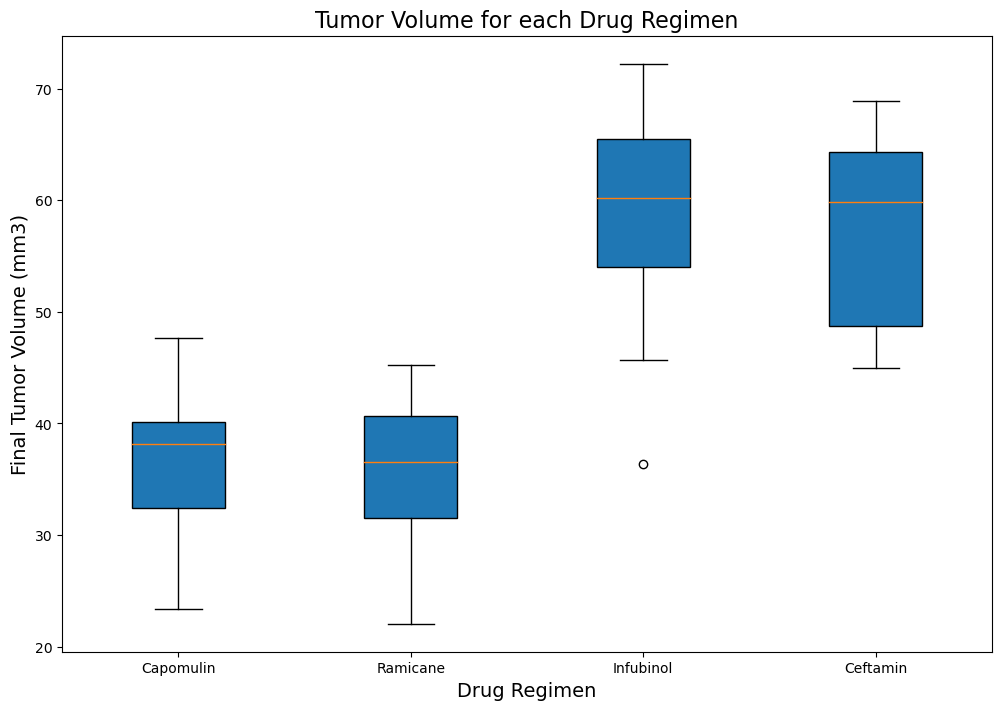

In [158]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_vol_empty, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

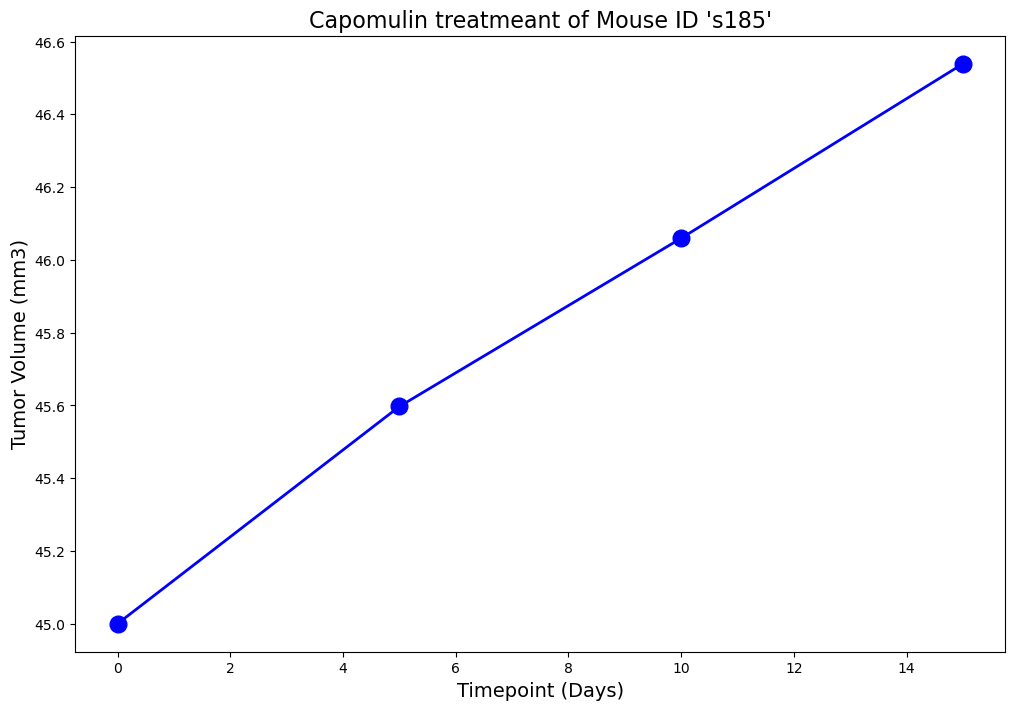

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
capomulin_df
mouse_on_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "r157",:]
mouse_on_capomulin

x_axis = mouce_on_capomulin["Timepoint"]
tumor_size = mouse_on_capomulin["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 's185'",fontsize =16)
plt.plot(x_axis, tumor_size,linewidth=2, markersize=12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

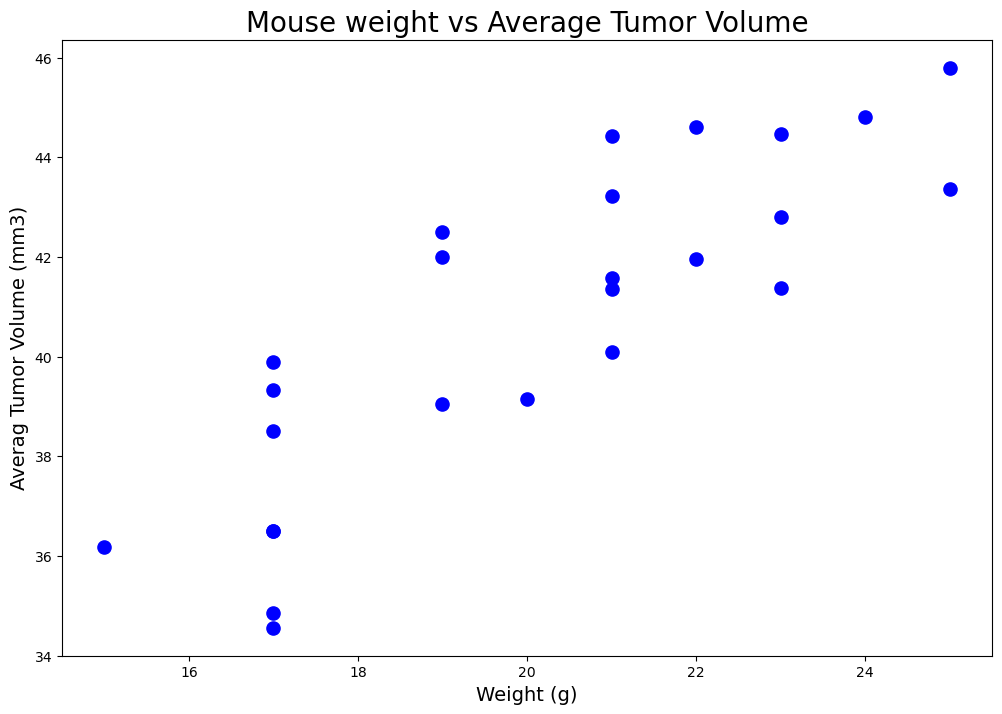

In [173]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mean_capom_df = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(mean_capom_df['Weight (g)'],mean_capom_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)

## Correlation and Regression

y = 0.95x + 21.55


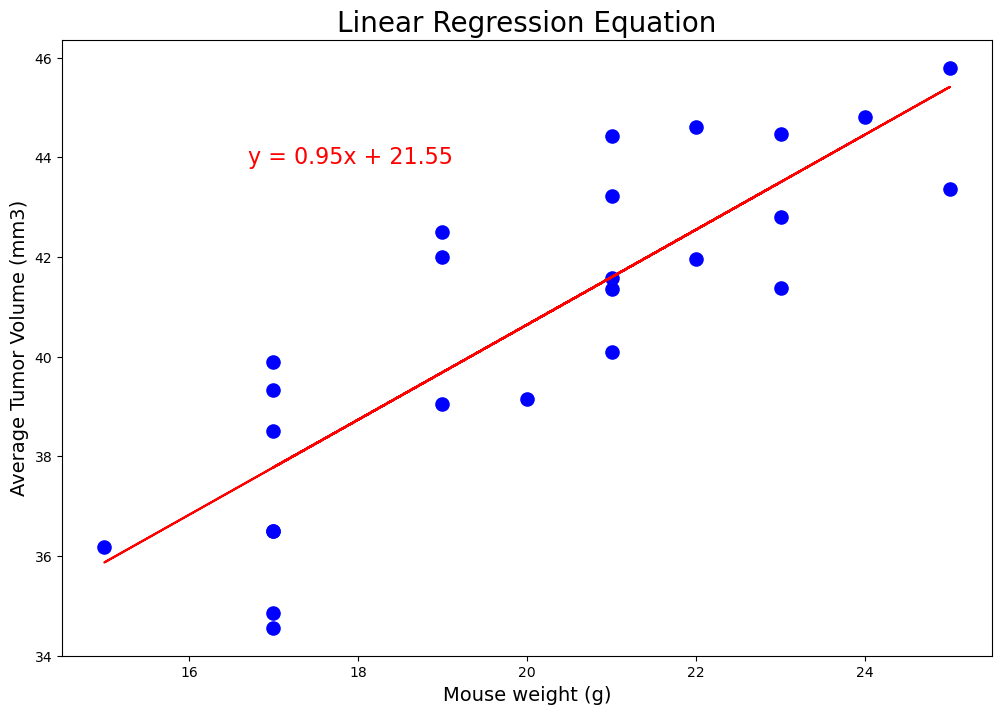

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean_capom_df['Weight (g)']
y_values = mean_capom_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation", fontsize=20)
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")
plt.show()